<a href="https://colab.research.google.com/github/riponalmamun/Basic_Model_WITH-BACKGROUND/blob/main/Basic_Model_WITH_BACKGROUND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

zip_path = '/content/Genitalia_Balanced_Original.zip'
extract_dir = '/content/Genitalia_Original_Balanced_DATASET'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 Folder: {root}")
    for file in files:
        print(f"  📄 {file}")
    break  # Remove this if you want to list all subfolders too

📁 Folder: /content/Genitalia_Original_Balanced_DATASET


🧾 Classes found: ['Ph_alexandri_female', 'Ph_alexandri_male', 'Ph_papatasi_female', 'Ph_papatasi_male', 'Ph_sergenti_female', 'Ph_sergenti_male']

📊 Image count per class:
  Ph_alexandri_female: 269 images
  Ph_alexandri_male: 269 images
  Ph_papatasi_female: 269 images
  Ph_papatasi_male: 269 images
  Ph_sergenti_female: 269 images
  Ph_sergenti_male: 269 images


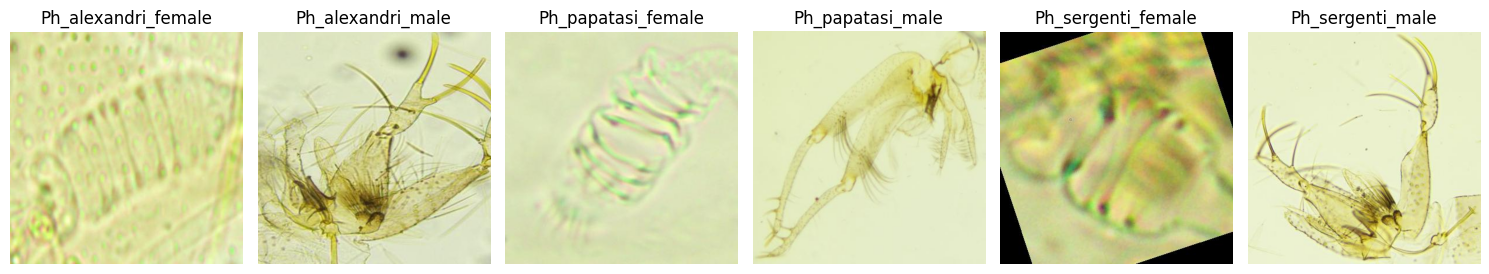

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set dataset directory
data_dir = '/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced'

# List class folders
classes = sorted(os.listdir(data_dir))
print("🧾 Classes found:", classes)

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = count

print("\n📊 Image count per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")

# Show a sample image from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        img = mpimg.imread(os.path.join(cls_path, img_files[0]))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(cls)

plt.tight_layout()
plt.show()


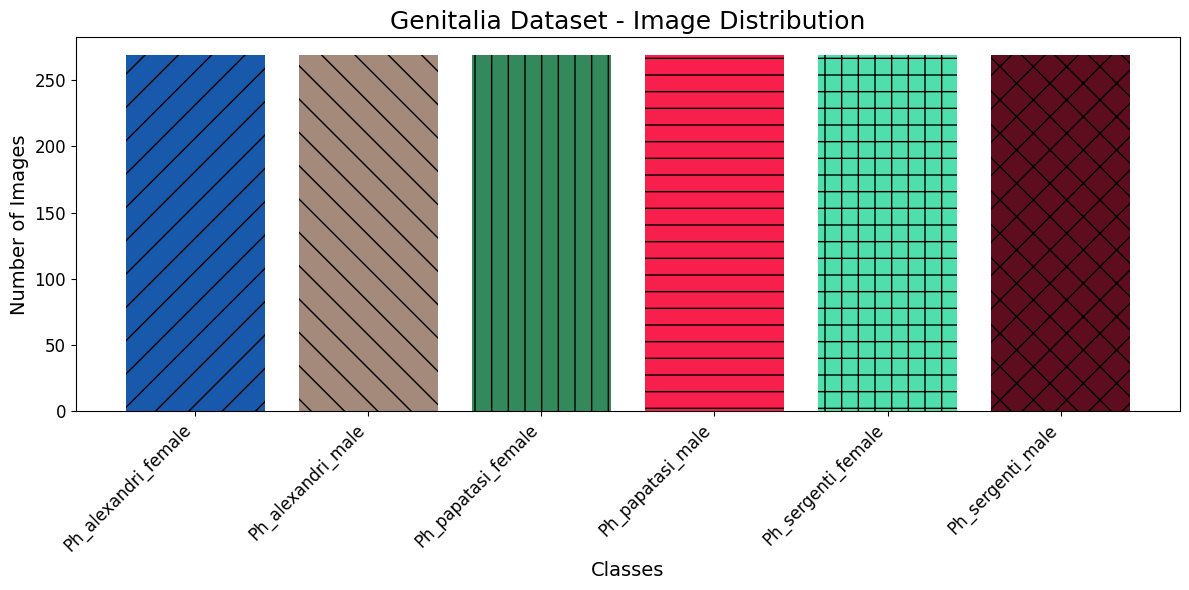


📊 Total images: 1614
📂 Image count per class:

              Class  Number of Images
Ph_alexandri_female               269
  Ph_alexandri_male               269
 Ph_papatasi_female               269
   Ph_papatasi_male               269
 Ph_sergenti_female               269
   Ph_sergenti_male               269


In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# Define dataset path
genitalia_path = '/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced'  # ✅ Adjust if needed

# Count images per class
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
class_counts = defaultdict(int)
total_images = 0

for class_folder in os.listdir(genitalia_path):
    class_path = os.path.join(genitalia_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ]
        count = len(image_files)
        class_counts[class_folder] = count
        total_images += count

# Prepare data for plotting
categories = sorted(class_counts.keys())
image_counts = [class_counts[cls] for cls in categories]

# Plotting
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"] * (len(categories) // 8 + 1)
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]
bars = plt.bar(categories, image_counts, color=colors)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("Genitalia Dataset - Image Distribution", fontsize=18)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
save_path = os.path.join(genitalia_path, "Genitalia_Image_Distribution.png")
plt.savefig(save_path, format="png", dpi=600)
plt.show()

# Table output
df = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(f"\n📊 Total images: {total_images}")
print("📂 Image count per class:\n")
print(df.to_string(index=False))


In [4]:
import shutil
import os
import random

# Define dataset source path
dataset_source = "/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced"

# Define target paths for train, validation, and test sets
train_path = "/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced/train"
val_path = "/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced/val"
test_path = "/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced/test"

# Create directories for train, validation, and test sets if they don't exist
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Define the split ratios for train, validation, and test
split_ratios = {"train": 0.8, "val": 0.05, "test": 0.15}

# Iterate through each class folder (assuming class-wise folder structure in the dataset)
for class_folder in os.listdir(dataset_source):
    class_path = os.path.join(dataset_source, class_folder)

    # Process only directories (class folders)
    if os.path.isdir(class_path):
        # List only image files within the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Shuffle the image filenames to randomize the split
        random.shuffle(images)

        # Calculate the number of images for each split
        train_split = int(len(images) * split_ratios["train"])
        val_split = int(len(images) * split_ratios["val"])
        test_split = len(images) - train_split - val_split

        # Split and copy images into respective directories
        for i, img in enumerate(images):
            src_img_path = os.path.join(class_path, img)

            # Determine the target folder based on the split
            if i < train_split:
                dest_folder = os.path.join(train_path, class_folder)
            elif i < train_split + val_split:
                dest_folder = os.path.join(val_path, class_folder)
            else:
                dest_folder = os.path.join(test_path, class_folder)

            # Ensure the target folder exists
            os.makedirs(dest_folder, exist_ok=True)

            # Define the full path for the destination image (with the image name included)
            dest_img_path = os.path.join(dest_folder, img)

            # Copy the image to the appropriate folder
            shutil.copy(src_img_path, dest_img_path)

print("✅ Dataset successfully split into train/val/test (80%/5%/15%)!")


✅ Dataset successfully split into train/val/test (80%/5%/15%)!


In [5]:
import os
from PIL import Image

dataset_dir = '/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        try:
            img = Image.open(os.path.join(root, file))
            img.verify()  # Verify if it's a valid image
        except (IOError, SyntaxError) as e:
            print(f"Invalid image file: {file} in {root}")
def process_images(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        # Further image processing here
    except (IOError, SyntaxError) as e:
        print(f"Error loading image {file_path}: {e}")


In [6]:
import os
from PIL import Image

def check_and_remove_corrupted_images(directory):
    invalid_images = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verifies if the file is a valid image
            except (IOError, SyntaxError) as e:
                print(f"Skipping invalid image: {file_path}")
                invalid_images.append(file_path)
                os.remove(file_path)  # Optionally, delete the corrupted image
    return invalid_images

# Apply this function to your dataset
check_and_remove_corrupted_images(train_path)
check_and_remove_corrupted_images(val_path)
check_and_remove_corrupted_images(test_path)


[]

In [7]:
from tensorflow.keras.preprocessing.image import load_img

# Custom function to safely load an image
def safe_load_img_from_directory(directory, target_size):
    valid_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = load_img(file_path, target_size=target_size)
                valid_files.append(file_path)
            except Exception as e:
                print(f"Skipping invalid image: {file_path}")
    return valid_files

# Define IMG_SIZE here
IMG_SIZE = (224, 224)

# Example: Use this function to load valid files
valid_train_images = safe_load_img_from_directory(train_path, IMG_SIZE)
valid_val_images = safe_load_img_from_directory(val_path, IMG_SIZE)
valid_test_images = safe_load_img_from_directory(test_path, IMG_SIZE)

# Use the list of valid files for your data generators

In [8]:
import os
from collections import defaultdict

# Count images per class
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
class_counts = defaultdict(int)
total_images = 0

for class_folder in os.listdir(genitalia_path):
    class_path = os.path.join(genitalia_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ]
        count = len(image_files)
        class_counts[class_folder] = count
        total_images += count

# Output total images and counts per class
print(f"\n📊 Total images: {total_images}")
print("📂 Image count per class:\n")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")



📊 Total images: 1614
📂 Image count per class:

val: 0 images
Ph_alexandri_male: 269 images
Ph_sergenti_male: 269 images
Ph_alexandri_female: 269 images
Ph_papatasi_male: 269 images
test: 0 images
Ph_sergenti_female: 269 images
Ph_papatasi_female: 269 images
train: 0 images



# EfficientNetV2S 😈

# DenseNet201 😈

# CustomCNN ❌

# ResNet50 😈


Found 1290 images belonging to 6 classes.
Found 78 images belonging to 6 classes.
Found 246 images belonging to 6 classes.
82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

🚀 Training EfficientNetV2S for 25 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4601 - loss: 1.3429
Epoch 1: val_loss improved from inf to 0.51108, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.4618 - loss: 1.3390 - val_accuracy: 0.8333 - val_loss: 0.5111 - learning_rate: 1.0000e-04
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8346 - loss: 0.4575
Epoch 2: val_loss improved from 0.51108 to 0.19869, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 304ms/step - accuracy: 0.8349 - loss: 0.4568 - val_accuracy: 0.9359 - val_loss: 0.1987 - learning_rate: 1.0000e-04
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9220 - loss: 0.2462
Epoch 3: val_loss improved from 0.19869 to 0.11531, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 307ms/step - accuracy: 0.9219 - loss: 0.2463 - val_accuracy: 0.9744 - val_loss: 0.1153 - learning_rate: 1.0000e-04
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9477 - loss: 0.1785
Epoch 4: val_loss did not improve from 0.11531
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - accuracy: 0.9477 - loss: 0.1784 - val_accuracy: 0.9615 - val_loss: 0.1921 - learning_rate: 1.0000e-04
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9400 - loss: 0.1794
Epoch 5: val_loss did not improve from 0.11531
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step - accuracy: 0.9398 - loss: 0.1800 - val_accuracy: 0.9359 - val_loss: 0.1484 - learning_rate: 1.0000e-04
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.9485 - loss: 0.1526
Epoch 6: val_loss did not improve from 0.11531
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - accuracy: 0.9486 - loss: 0.1524 - val_accuracy: 0.9615 - val_loss: 0.1322 - learning_rate: 1.0000e-04
Epoch 7/25
81/81 

81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 308ms/step - accuracy: 0.9739 - loss: 0.1122 - val_accuracy: 0.9615 - val_loss: 0.1065 - learning_rate: 1.0000e-04
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9737 - loss: 0.0861
Epoch 8: val_loss improved from 0.10655 to 0.08121, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 306ms/step - accuracy: 0.9736 - loss: 0.0863 - val_accuracy: 0.9872 - val_loss: 0.0812 - learning_rate: 1.0000e-04
Epoch 9/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9796 - loss: 0.0796
Epoch 9: val_loss improved from 0.08121 to 0.06509, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 306ms/step - accuracy: 0.9796 - loss: 0.0796 - val_accuracy: 0.9744 - val_loss: 0.0651 - learning_rate: 1.0000e-04
Epoch 10/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9734 - loss: 0.0849
Epoch 10: val_loss did not improve from 0.06509
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - accuracy: 0.9734 - loss: 0.0849 - val_accuracy: 0.9231 - val_loss: 0.1765 - learning_rate: 1.0000e-04
Epoch 11/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9720 - loss: 0.0892
Epoch 11: val_loss improved from 0.06509 to 0.04229, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.9722 - loss: 0.0890 - val_accuracy: 0.9872 - val_loss: 0.0423 - learning_rate: 1.0000e-04
Epoch 12/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9788 - loss: 0.0815
Epoch 12: val_loss did not improve from 0.04229
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step - accuracy: 0.9788 - loss: 0.0813 - val_accuracy: 0.9744 - val_loss: 0.1063 - learning_rate: 1.0000e-04
Epoch 13/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9858 - loss: 0.0564
Epoch 13: val_loss did not improve from 0.04229
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step - accuracy: 0.9858 - loss: 0.0564 - val_accuracy: 0.9872 - val_loss: 0.0666 - learning_rate: 1.0000e-04
Epoch 14/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9757 - loss: 0.0752
Epoch 14: val_loss did not improve from 0.04229
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step - accuracy: 0.9758 - loss: 0.0750 - val_accuracy: 0.9615 - val_loss: 0.1483 - learning_rate: 1.0000e-04
Epoch 15/25

81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 348ms/step - accuracy: 0.9804 - loss: 0.0667 - val_accuracy: 0.9744 - val_loss: 0.0421 - learning_rate: 1.0000e-04
Epoch 20/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9954 - loss: 0.0328
Epoch 20: val_loss did not improve from 0.04214
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step - accuracy: 0.9954 - loss: 0.0328 - val_accuracy: 0.9872 - val_loss: 0.0638 - learning_rate: 1.0000e-04
Epoch 21/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9927 - loss: 0.0384
Epoch 21: val_loss did not improve from 0.04214
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 277ms/step - accuracy: 0.9927 - loss: 0.0383 - val_accuracy: 0.9744 - val_loss: 0.0777 - learning_rate: 1.0000e-04
Epoch 22/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9908 - loss: 0.0406
Epoch 22: val_loss improved from 0.04214 to 0.03617, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 49s 374ms/step - accuracy: 0.9908 - loss: 0.0406 - val_accuracy: 0.9872 - val_loss: 0.0362 - learning_rate: 1.0000e-04
Epoch 23/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9962 - loss: 0.0280
Epoch 23: val_loss improved from 0.03617 to 0.02490, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 304ms/step - accuracy: 0.9962 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 0.0249 - learning_rate: 1.0000e-04
Epoch 24/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9964 - loss: 0.0334
Epoch 24: val_loss did not improve from 0.02490
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - accuracy: 0.9964 - loss: 0.0335 - val_accuracy: 0.9615 - val_loss: 0.0994 - learning_rate: 1.0000e-04
Epoch 25/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9954 - loss: 0.0343
Epoch 25: val_loss improved from 0.02490 to 0.02194, saving model to best_model.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 47s 350ms/step - accuracy: 0.9955 - loss: 0.0342 - val_accuracy: 1.0000 - val_loss: 0.0219 - learning_rate: 1.0000e-04
✅ Evaluating EfficientNetV2S
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 513ms/step - accuracy: 0.9844 - loss: 0.0737
EfficientNetV2S Test Accuracy: 98.37%


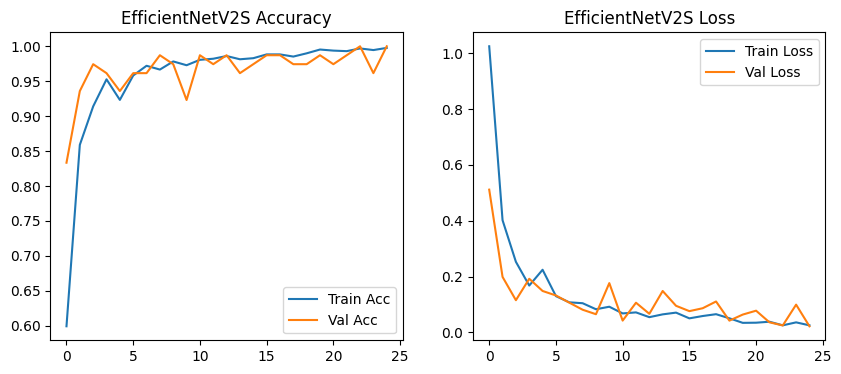

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 771ms/step
📊 Classification Report for EfficientNetV2S
                     precision    recall  f1-score   support

Ph_alexandri_female       0.98      1.00      0.99        41
  Ph_alexandri_male       0.97      0.95      0.96        41
 Ph_papatasi_female       1.00      0.98      0.99        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       1.00      1.00      1.00        41
   Ph_sergenti_male       0.95      0.98      0.96        41

           accuracy                           0.98       246
          macro avg       0.98      0.98      0.98       246
       weighted avg       0.98      0.98      0.98       246



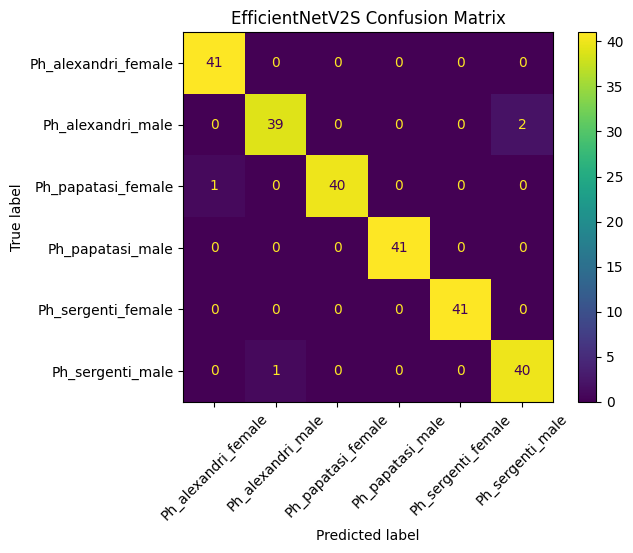


🚀 Training DenseNet201 for 25 epochs
Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5750 - loss: 1.0290
Epoch 1: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 804s 5s/step - accuracy: 0.5766 - loss: 1.0249 - val_accuracy: 0.7949 - val_loss: 0.4748 - learning_rate: 1.0000e-04
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8708 - loss: 0.3344
Epoch 2: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.8711 - loss: 0.3336 - val_accuracy: 0.7821 - val_loss: 0.6031 - learning_rate: 1.0000e-04
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.9327 - loss: 0.2016
Epoch 3: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.9327 - loss: 0.2016 - val_accuracy: 0.9615 - val_loss: 0.1923 - learning_rate: 1.0000e-04
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.9564 - loss: 0.1339
Epoch 4: val_loss did not improve from 0.021

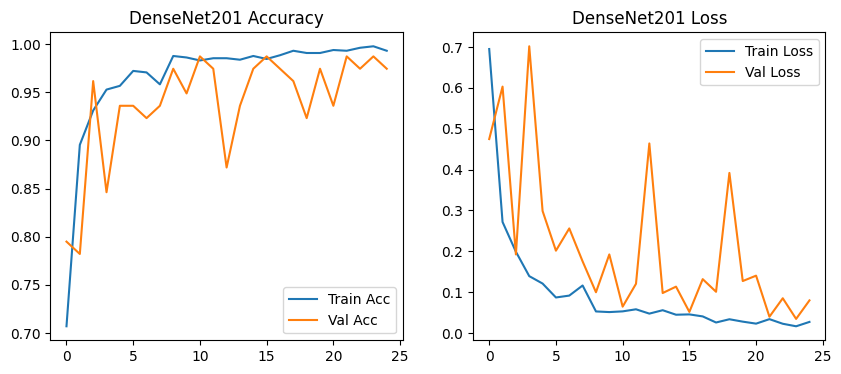

16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step
📊 Classification Report for DenseNet201
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        41
  Ph_alexandri_male       0.95      1.00      0.98        41
 Ph_papatasi_female       1.00      1.00      1.00        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       1.00      1.00      1.00        41
   Ph_sergenti_male       1.00      0.95      0.97        41

           accuracy                           0.99       246
          macro avg       0.99      0.99      0.99       246
       weighted avg       0.99      0.99      0.99       246



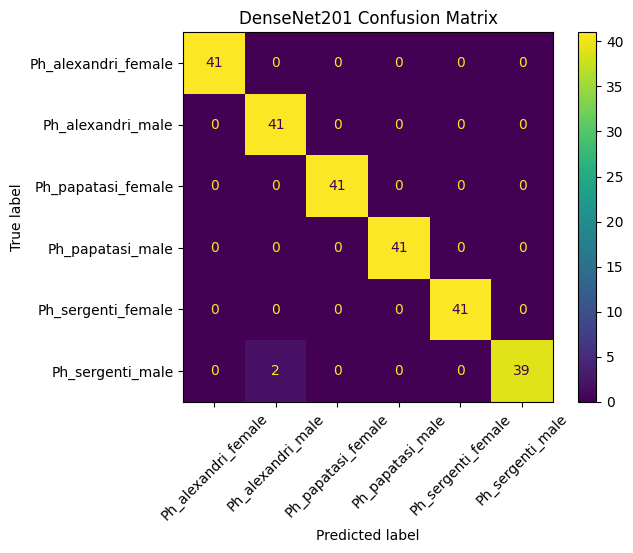


🚀 Training CustomCNN for 25 epochs
Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.1694 - loss: 1.9309
Epoch 1: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 30s 292ms/step - accuracy: 0.1694 - loss: 1.9305 - val_accuracy: 0.2821 - val_loss: 1.8591 - learning_rate: 0.0010
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.1998 - loss: 1.8531
Epoch 2: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - accuracy: 0.1998 - loss: 1.8530 - val_accuracy: 0.1795 - val_loss: 1.8141 - learning_rate: 0.0010
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.2225 - loss: 1.8213
Epoch 3: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.2226 - loss: 1.8210 - val_accuracy: 0.1795 - val_loss: 1.7700 - learning_rate: 0.0010
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.2304 - loss: 1.7548
Epoch 4: val_loss did not improve from 0.02194
81/81 

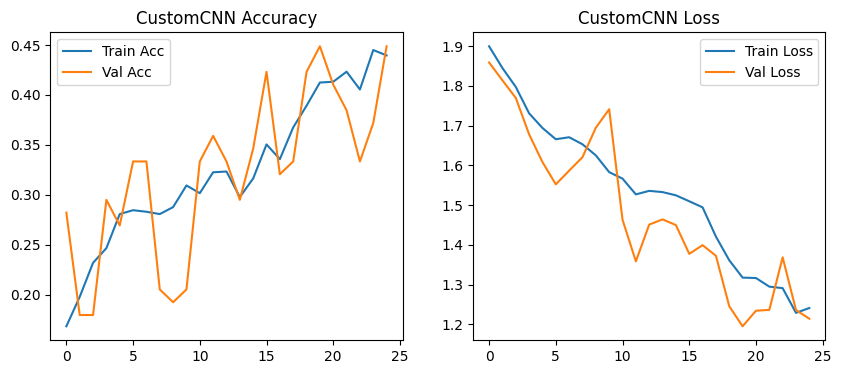

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
📊 Classification Report for CustomCNN
                     precision    recall  f1-score   support

Ph_alexandri_female       0.39      0.44      0.41        41
  Ph_alexandri_male       0.42      1.00      0.59        41
 Ph_papatasi_female       0.55      0.88      0.68        41
   Ph_papatasi_male       0.66      0.51      0.58        41
 Ph_sergenti_female       0.00      0.00      0.00        41
   Ph_sergenti_male       0.00      0.00      0.00        41

           accuracy                           0.47       246
          macro avg       0.34      0.47      0.38       246
       weighted avg       0.34      0.47      0.38       246



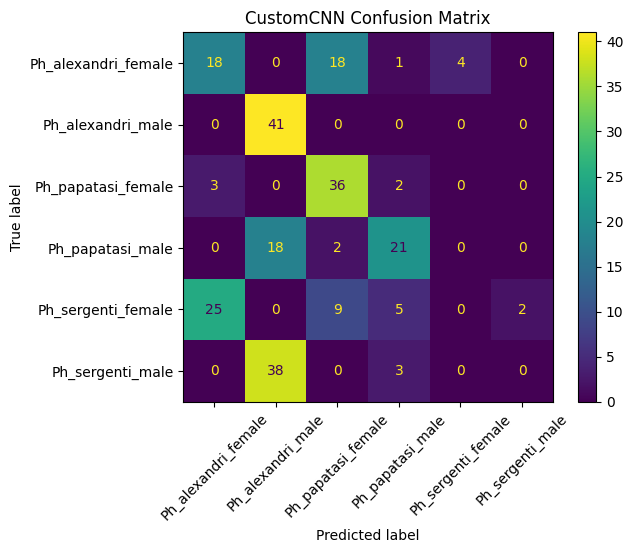


🚀 Training ResNet50 for 25 epochs
Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.5965 - loss: 1.0167
Epoch 1: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 121s 710ms/step - accuracy: 0.5980 - loss: 1.0127 - val_accuracy: 0.1667 - val_loss: 2.4355 - learning_rate: 1.0000e-04
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.8483 - loss: 0.3754
Epoch 2: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step - accuracy: 0.8485 - loss: 0.3751 - val_accuracy: 0.1667 - val_loss: 3.9357 - learning_rate: 1.0000e-04
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9125 - loss: 0.2635
Epoch 3: val_loss did not improve from 0.02194
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 283ms/step - accuracy: 0.9125 - loss: 0.2635 - val_accuracy: 0.1667 - val_loss: 3.3568 - learning_rate: 1.0000e-04
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9107 - loss: 0.2412
Epoch 4: val_loss did not improve from 0.

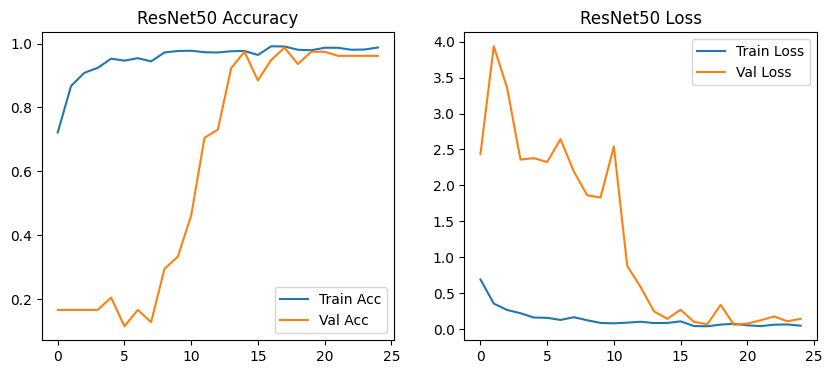

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step
📊 Classification Report for ResNet50
                     precision    recall  f1-score   support

Ph_alexandri_female       0.95      1.00      0.98        41
  Ph_alexandri_male       1.00      0.78      0.88        41
 Ph_papatasi_female       1.00      1.00      1.00        41
   Ph_papatasi_male       0.98      0.98      0.98        41
 Ph_sergenti_female       1.00      0.95      0.97        41
   Ph_sergenti_male       0.80      0.98      0.88        41

           accuracy                           0.95       246
          macro avg       0.95      0.95      0.95       246
       weighted avg       0.95      0.95      0.95       246



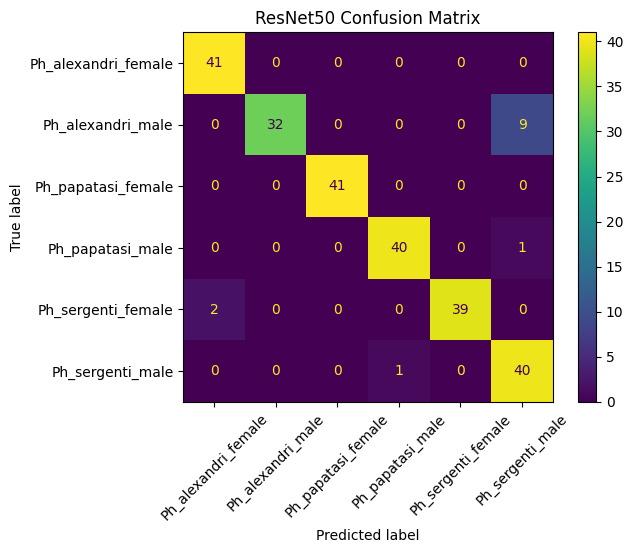


🤝 Evaluating Ensemble Model (Average Fusion) - Basic Models
Ensemble Test Accuracy (Basic): 99.19%
📊 Classification Report for Ensemble (Basic)
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        41
  Ph_alexandri_male       1.00      0.95      0.97        41
 Ph_papatasi_female       1.00      1.00      1.00        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       1.00      1.00      1.00        41
   Ph_sergenti_male       0.95      1.00      0.98        41

           accuracy                           0.99       246
          macro avg       0.99      0.99      0.99       246
       weighted avg       0.99      0.99      0.99       246



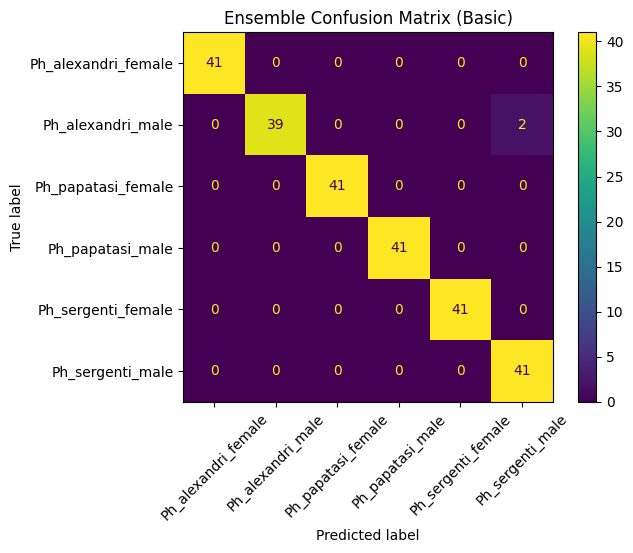

In [9]:
# --- Install dependencies ---
!pip install tensorflow matplotlib scikit-learn

# --- Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (Dropout, GlobalAveragePooling2D, Reshape, Dense, Conv2D, MaxPooling2D, Input)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2S, DenseNet201, ResNet50
from PIL import Image

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- Basic Model builders without attention ---
def build_model_basic(base_model_func, name="Model"):
    base_model = base_model_func(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=x, name=name)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_custom_cnn_basic():
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)
    model = Model(inputs, outputs, name="CustomCNN")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1),  # Patience updated to 10
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Models to train ---
models_basic = {
    "EfficientNetV2S": build_model_basic(EfficientNetV2S, "EffNetV2S"),
    "DenseNet201": build_model_basic(DenseNet201, "DenseNet201"),
    "CustomCNN": build_custom_cnn_basic(),
    "ResNet50": build_model_basic(ResNet50, "ResNet50")
}

# --- Training and evaluation (for the simplified models) ---
history_dict_basic = {}
model_predictions_basic = {}
model_results_basic = {}

for name, model in models_basic.items():
    print(f"\n🚀 Training {name} for 25 epochs")  # Epochs updated to 25
    history = model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)  # Epochs updated to 25
    history_dict_basic[name] = history

    pd.DataFrame(history.history).to_csv(f"{name}_history_basic.csv", index=False)

    print(f"✅ Evaluating {name}")
    loss, acc = model.evaluate(test_gen)
    print(f"{name} Test Accuracy: {acc * 100:.2f}%")
    model_results_basic[name] = acc

    # Plotting the performance
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f"{name} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} Loss")
    plt.legend()
    plt.show()

    # Making predictions and evaluating
    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    model_predictions_basic[name] = preds

    print(f"📊 Classification Report for {name}")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
    disp.plot(xticks_rotation=45)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# --- Ensemble (basic models) ---
print("\n🤝 Evaluating Ensemble Model (Average Fusion) - Basic Models")
ensemble_preds_basic = np.mean(list(model_predictions_basic.values()), axis=0)
y_pred_ensemble_basic = np.argmax(ensemble_preds_basic, axis=1)
ensemble_acc_basic = np.mean(y_pred_ensemble_basic == test_gen.classes)
print(f"Ensemble Test Accuracy (Basic): {ensemble_acc_basic * 100:.2f}%")

print("📊 Classification Report for Ensemble (Basic)")
print(classification_report(test_gen.classes, y_pred_ensemble_basic, target_names=list(test_gen.class_indices.keys())))
cm = confusion_matrix(test_gen.classes, y_pred_ensemble_basic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("Ensemble Confusion Matrix (Basic)")
plt.show()


# MobileNetV2 😈

Found 1290 images belonging to 6 classes.
Found 78 images belonging to 6 classes.
Found 246 images belonging to 6 classes.

🚀 Training MobileNetV2_Basic for 25 epochs
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.4402 - loss: 1.4620
Epoch 1: val_loss improved from inf to 0.87063, saving model to best_model_mobilenetv2_basic.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 52s 385ms/step - accuracy: 0.4433 - loss: 1.4530 - val_accuracy: 0.6282 - val_loss: 0.8706 - learning_rate: 1.0000e-04
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.7018 - loss: 0.6759
Epoch 2: val_loss improved from 0.87063 to 0.79022, saving model to best_model_mobilenetv2_basic.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 226ms/step - accuracy: 0.7019 - loss: 0.6756 - val_accuracy: 0.7564 - val_loss: 0.7902 - learning_rate: 1.0000e-04
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.7753 - loss: 0.5582
Epoch 3: val_loss did not improve from 0.79022
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.7754 - loss: 0.5580 - val_accuracy: 0.7179 - val_loss: 0.8216 - learning_rate: 1.0000e-04
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.7919 - loss: 0.5278
Epoch 4: val_loss did not improve from 0.79022
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - accuracy: 0.7920 - loss: 0.5273 - val_accuracy: 0.7051 - val_loss: 0.9144 - learning_rate: 1.0000e-04
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.8400 - loss: 0.3828
Epoch 5: val_loss did not improve from 0.79022
81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.8400 - loss: 0.3829 - val_accuracy: 0.7179 - val_loss: 0.7993 - learning_rate: 1.0000e-04
Epoch 6/25
81/81 

81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.8158 - loss: 0.4752 - val_accuracy: 0.7436 - val_loss: 0.6731 - learning_rate: 1.0000e-04
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8766 - loss: 0.3418
Epoch 7: val_loss improved from 0.67313 to 0.60496, saving model to best_model_mobilenetv2_basic.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.8766 - loss: 0.3418 - val_accuracy: 0.7821 - val_loss: 0.6050 - learning_rate: 1.0000e-04
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8772 - loss: 0.3483
Epoch 8: val_loss improved from 0.60496 to 0.56349, saving model to best_model_mobilenetv2_basic.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.8772 - loss: 0.3480 - val_accuracy: 0.7436 - val_loss: 0.5635 - learning_rate: 1.0000e-04
Epoch 9/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.9024 - loss: 0.2941
Epoch 9: val_loss improved from 0.56349 to 0.42270, saving model to best_model_mobilenetv2_basic.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 197ms/step - accuracy: 0.9022 - loss: 0.2943 - val_accuracy: 0.8077 - val_loss: 0.4227 - learning_rate: 1.0000e-04
Epoch 10/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9021 - loss: 0.2806
Epoch 10: val_loss did not improve from 0.42270
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.9019 - loss: 0.2810 - val_accuracy: 0.8077 - val_loss: 0.5826 - learning_rate: 1.0000e-04
Epoch 11/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9135 - loss: 0.2374
Epoch 11: val_loss did not improve from 0.42270
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - accuracy: 0.9135 - loss: 0.2375 - val_accuracy: 0.8333 - val_loss: 0.5577 - learning_rate: 1.0000e-04
Epoch 12/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9170 - loss: 0.2536
Epoch 12: val_loss did not improve from 0.42270
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.9169 - loss: 0.2540 - val_accuracy: 0.7949 - val_loss: 0.6656 - learning_rate: 1.0000e-04
Epoch 13/25

81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - accuracy: 0.9091 - loss: 0.2729 - val_accuracy: 0.8590 - val_loss: 0.3280 - learning_rate: 1.0000e-04
Epoch 14/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9215 - loss: 0.2276
Epoch 14: val_loss did not improve from 0.32798
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.9213 - loss: 0.2279 - val_accuracy: 0.8462 - val_loss: 0.4639 - learning_rate: 1.0000e-04
Epoch 15/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9140 - loss: 0.2488
Epoch 15: val_loss did not improve from 0.32798
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.9141 - loss: 0.2486 - val_accuracy: 0.8333 - val_loss: 0.3747 - learning_rate: 1.0000e-04
Epoch 16/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9242 - loss: 0.1936
Epoch 16: val_loss did not improve from 0.32798
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.9242 - loss: 0.1939 - val_accuracy: 0.8205 - val_loss: 0.6071 - learning_rate: 1.0000e-04
Epoch 17/25

81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - accuracy: 0.9448 - loss: 0.1375 - val_accuracy: 0.9231 - val_loss: 0.2985 - learning_rate: 5.0000e-05
✅ Evaluating MobileNetV2_Basic
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.8645 - loss: 0.5209
MobileNetV2_Basic Test Accuracy: 91.87%


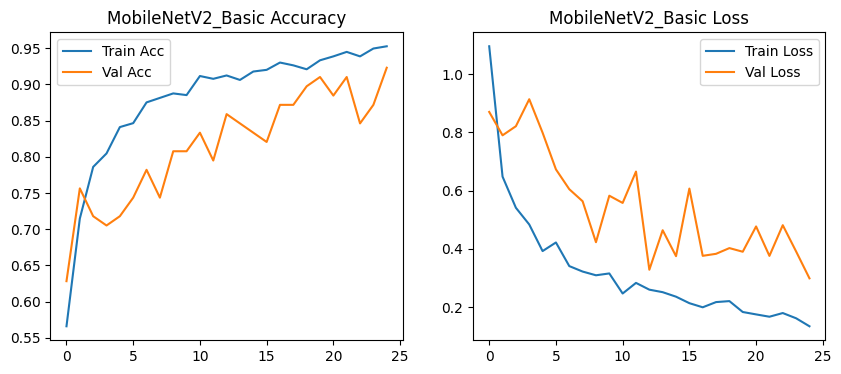

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step
📊 Classification Report for MobileNetV2_Basic
                     precision    recall  f1-score   support

Ph_alexandri_female       0.97      0.76      0.85        41
  Ph_alexandri_male       0.98      0.98      0.98        41
 Ph_papatasi_female       1.00      0.80      0.89        41
   Ph_papatasi_male       1.00      1.00      1.00        41
 Ph_sergenti_female       0.71      1.00      0.83        41
   Ph_sergenti_male       0.98      0.98      0.98        41

           accuracy                           0.92       246
          macro avg       0.94      0.92      0.92       246
       weighted avg       0.94      0.92      0.92       246



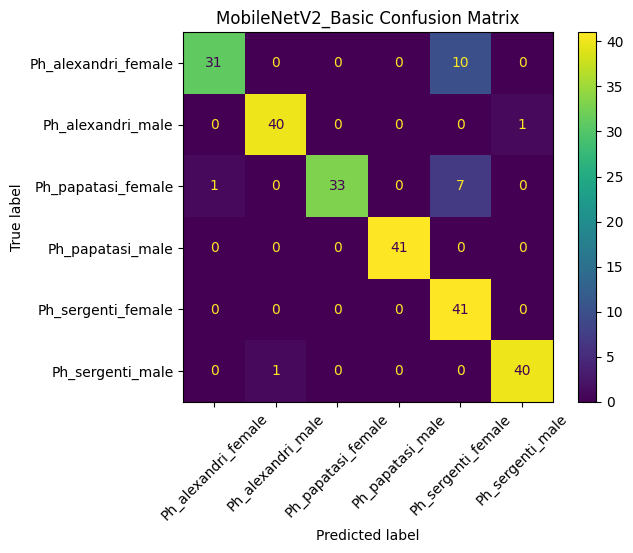

In [10]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Reshape,
                                     Lambda, Add, Concatenate, Input, GlobalMaxPooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Original_Balanced_DATASET/Genitalia_Balanced"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators with enhanced data augmentation ---
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    zoom_range=0.3,  # Increased zoom range
    shear_range=0.2,  # Added shear range
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- Basic MobileNetV2 Model (without CBAM or SE) ---
def build_mobilenetv2_basic():
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    base_model.trainable = True  # Unfreeze the entire model
    for layer in base_model.layers[:-20]:  # Optionally freeze the earlier layers
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Adjusted dropout

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=outputs, name="MobileNetV2_Basic")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1),  # Patience updated to 10
    ModelCheckpoint('best_model_mobilenetv2_basic.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Training the MobileNetV2_Basic Model ---
history_dict = {}
model_predictions = {}
model_results = {}

# Train the MobileNetV2_Basic model
print("\n🚀 Training MobileNetV2_Basic for 25 epochs")  # Epochs updated to 25
history = build_mobilenetv2_basic().fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)
history_dict["MobileNetV2_Basic"] = history

# Save training history to CSV
pd.DataFrame(history.history).to_csv("MobileNetV2_Basic_history.csv", index=False)

# Evaluate the model
print(f"✅ Evaluating MobileNetV2_Basic")
loss, acc = history.model.evaluate(test_gen)
print(f"MobileNetV2_Basic Test Accuracy: {acc * 100:.2f}%")
model_results["MobileNetV2_Basic"] = acc

# Plot training/validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MobileNetV2_Basic Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MobileNetV2_Basic Loss")
plt.legend()
plt.show()

# Classification Report and Confusion Matrix
preds = history.model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
model_predictions["MobileNetV2_Basic"] = preds

print(f"📊 Classification Report for MobileNetV2_Basic")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("MobileNetV2_Basic Confusion Matrix")
plt.show()
